### Importing Libraries

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Data Preprocessing**

Training Image Preprocessing

In [26]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train', #the name of the foldr which you want to train
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### **Validation Image Preprocessing**

In [27]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [28]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [29]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[152.75 138.75 135.75]
   [158.75 144.75 141.75]
   [156.   142.   139.  ]
   ...
   [185.25 181.25 182.25]
   [182.   178.   179.  ]
   [188.5  184.5  185.5 ]]

  [[157.75 143.75 140.75]
   [150.   136.   133.  ]
   [155.75 141.75 138.75]
   ...
   [190.25 186.25 187.25]
   [186.75 182.75 183.75]
   [184.5  180.5  181.5 ]]

  [[157.25 143.25 140.25]
   [155.5  141.5  138.5 ]
   [151.5  137.5  134.5 ]
   ...
   [189.25 185.25 186.25]
   [185.5  181.5  182.5 ]
   [187.5  183.5  184.5 ]]

  ...

  [[136.5  115.5  112.5 ]
   [132.5  111.5  108.5 ]
   [137.5  116.5  113.5 ]
   ...
   [172.75 164.75 162.75]
   [175.25 167.25 165.25]
   [182.   174.   172.  ]]

  [[135.   114.   111.  ]
   [135.5  114.5  111.5 ]
   [132.5  111.5  108.5 ]
   ...
   [174.   166.   164.  ]
   [173.   165.   163.  ]
   [175.5  167.5  165.5 ]]

  [[133.25 112.25 109.25]
   [138.5  117.5  114.5 ]
   [123.5  102.5   99.5 ]
   ...
   [179.5  171.5  169.5 ]
   [179.5  171.5  169.5 ]
   [178.25 170.25 16

### To Avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. there may be chance of Underfitting, so increase number of neuron
3. Add more convolution layer to extract more feature from images there may be possibility that model unable to capture relevent feature or model is confusing due to lack of feature so feed with more feature


# **Building Model**

*   List item
*   List item


In [30]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [31]:
model = Sequential()

## Building Convolution Layer

In [32]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Dropout(0.25)) # To Avoid overfitting

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(units=1500,activation='relu'))

In [40]:
model.add(Dropout(0.4))

In [41]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling model

In [42]:


# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [45]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4837s 2s/step - accuracy: 0.4269 - loss: 2.0176 - val_accuracy: 0.8112 - val_loss: 0.5940
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4500s 2s/step - accuracy: 0.8437 - loss: 0.4914 - val_accuracy: 0.9121 - val_loss: 0.2728
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4491s 2s/step - accuracy: 0.9082 - loss: 0.2859 - val_accuracy: 0.9383 - val_loss: 0.1855
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4743s 2s/step - accuracy: 0.9393 - loss: 0.1845 - val_accuracy: 0.9460 - val_loss: 0.1705
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5674s 3s/step - accuracy: 0.9529 - loss: 0.1422 - val_accuracy: 0.9585 - val_loss: 0.1319
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5317s 2s/step - accuracy: 0.9648 - loss: 0.1079 - val_accuracy: 0.9651 - val_loss: 0.1117
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4832s 2s/step - accuracy: 0.9706 - loss: 0.0906 - val_accuracy: 0.9661 - val_loss: 0.1130
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4541s 2s/step - accuracy: 0.9749 -

## Evaluating Model

In [46]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1349s 614ms/step - accuracy: 0.9834 - loss: 0.0510
Training accuracy: 0.9852905869483948


In [47]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 332s 602ms/step - accuracy: 0.9561 - loss: 0.1411
Validation accuracy: 0.957659900188446


### Saving Model

In [59]:
model.save("trained_model.keras")

In [ ]:
# model.save('trained_model.keras')

In [60]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6239703893661499,
  0.8654527068138123,
  0.9176186323165894,
  0.9430685043334961,
  0.958062469959259,
  0.9662991762161255,
  0.9729141592979431,
  0.976385235786438,
  0.9800554513931274,
  0.9825876951217651],
 'loss': [1.2662907838821411,
  0.42086586356163025,
  0.2556857764720917,
  0.17231535911560059,
  0.1293671876192093,
  0.10089161992073059,
  0.08196204900741577,
  0.07200636714696884,
  0.06137901172041893,
  0.053972870111465454],
 'val_accuracy': [0.8111768960952759,
  0.9120760560035706,
  0.9383109211921692,
  0.9459936022758484,
  0.9585135579109192,
  0.965114951133728,
  0.9661393165588379,
  0.9636922478675842,
  0.9681311249732971,
  0.957659900188446],
 'val_loss': [0.5940120816230774,
  0.2727743685245514,
  0.18550236523151398,
  0.17045429348945618,
  0.13186432421207428,
  0.11169631779193878,
  0.11295835673809052,
  0.11812565475702286,
  0.11322436481714249,
  0.14116714894771576]}

In [62]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [63]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

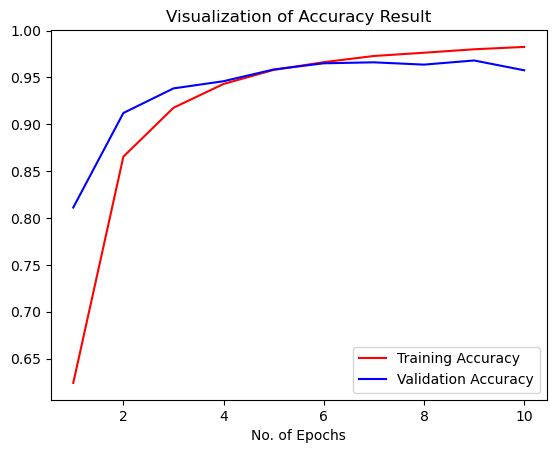

In [64]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [65]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [66]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [98]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 1483s 84ms/step


(array([[9.9999988e-01, 2.8084249e-10, 5.2776290e-11, ..., 1.6421431e-15,
         5.3814077e-13, 1.9970343e-12],
        [9.9994087e-01, 2.7446572e-07, 2.8634248e-09, ..., 9.3021334e-11,
         8.8564955e-10, 9.5855714e-09],
        [1.0000000e+00, 1.3712131e-13, 8.9799308e-15, ..., 4.2061072e-25,
         7.6087282e-17, 3.1998414e-15],
        ...,
        [4.8655296e-10, 5.9318734e-13, 4.8041717e-09, ..., 1.3920819e-10,
         2.6414299e-10, 9.9998152e-01],
        [1.3686592e-08, 7.6828760e-12, 2.4222784e-08, ..., 1.2012135e-09,
         2.5800801e-09, 9.9997950e-01],
        [9.2246062e-14, 1.9582426e-13, 8.4463929e-11, ..., 1.9637475e-14,
         8.4613670e-12, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [77]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [78]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [80]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [81]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [82]:
# predicted_categories

In [84]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [85]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.96      0.94       504
                                 Apple___Black_rot       1.00      0.97      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       440
                                   Apple___healthy       0.95      0.93      0.94       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.95      0.95       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.96      0.

In [89]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[484,   1,   0, ...,   0,   0,   0],
       [  2, 484,   0, ...,   0,   0,   0],
       [  0,   0, 433, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 474,   0,   0],
       [  5,   0,   0, ...,   0, 435,   0],
       [  1,   0,   0, ...,   0,   0, 476]], dtype=int64)

### Confusion Matrix Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

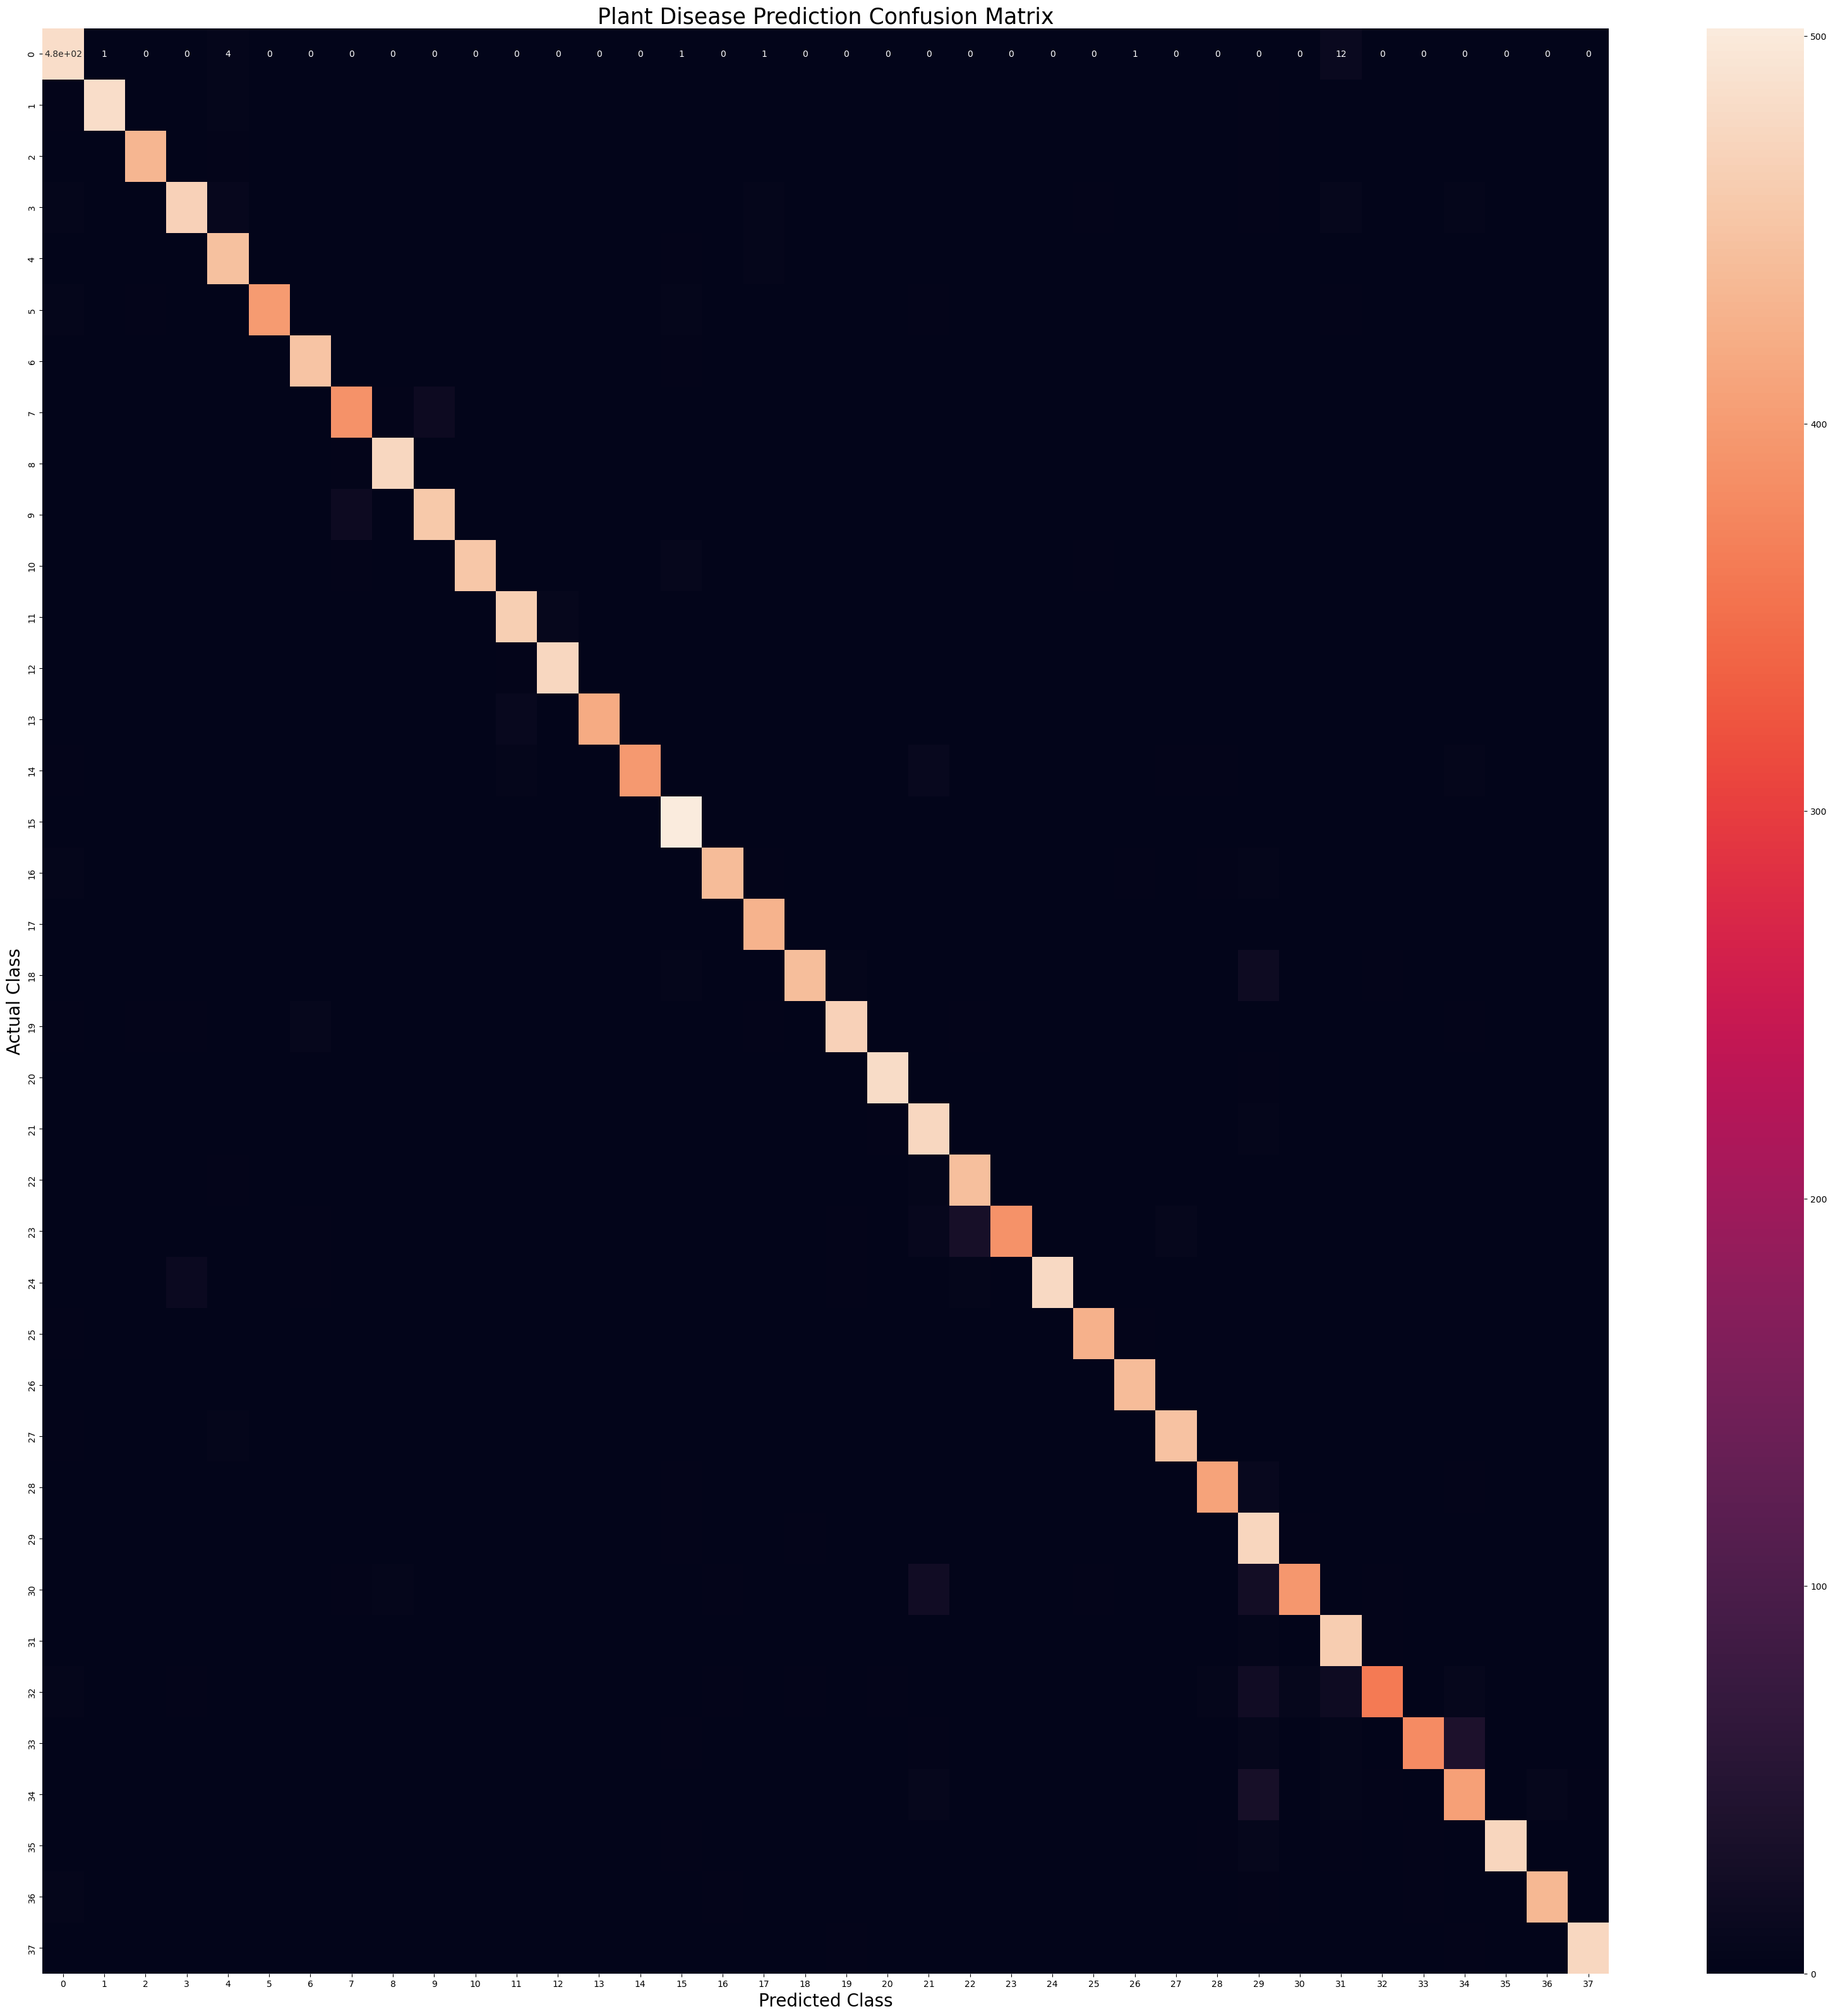

In [99]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show